##Completed tasks:
*   Data Analysis
*   Univariate LSTM
*   Multivariate LSTM
*   ARIMA Model
- Multivariate LSTM (predicting original data) w/ smoothed values as one of the features
- LSTM on Residuals
- Moving Average Extrapolation
- Exp Smoothing Extrapolation
- HoltsWinter
- Correlation matrix for feature selection
- informer, autoformer and fedformer (in another file)
- multiple timestep predictions
- try different alpha values (grid search)




##Notes:
- Notebook is ran in google collab with pdw_all_cleaned in same google drive as this google collab file.
- Email me at shandixit2002@gmail.com for access to the data.







# Data Loading and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#!ls drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/X-Force /pdw_all_cleaned.csv')

In [ ]:
# --------
# Settings
# --------
df_name = 'pon1' # pon2, qen1, qen2, qen3
quick_run = True

# --------
# Imports
# --------
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

In [ ]:
# Rename columns
df.rename(columns={
    'BinNo': 'BinNo',
    'PulseWidth': 'PW',
    'PulsesPerSecond': 'PPS',
    'PulsesPerBurst': 'PPB',
    'ChirpWidth': 'CW',
    'ChirpDirection': 'CD',
    'ActualPulseWidth': 'APW',
    'PhaseCodingType': 'PCT',
    'radarStatus': 'RS',
    'radarSignalCenterFreq': 'RSCF',
    'radarSignalStartTime': 'RSST',    # Radar Signal Start Time
    'SNR': 'SNR'
}, inplace=True)

df

BinNo            PW   PPS  PPB          CW    CD           APW  PCT  \
0      P0N#1  1.100000e-06   970   15         NaN   NaN  1.100000e-06  NaN   
1      P0N#1  2.500000e-06   900   25         NaN   NaN  2.500000e-06  NaN   
2      P0N#1  5.000000e-07  1010   35         NaN   NaN  5.000000e-07  NaN   
3      P0N#1  1.800000e-06  1020   35         NaN   NaN  1.800000e-06  NaN   
4      P0N#1  1.200000e-06   910   25         NaN   NaN  1.200000e-06  NaN   
...      ...           ...   ...  ...         ...   ...           ...  ...   
19995  Q3N#3  8.000000e-05  1600   24  60000000.0  Down  8.000000e-05  NaN   
19996  Q3N#3  9.500000e-05  2900   18  50000000.0    Up  9.500000e-05  NaN   
19997  Q3N#3  1.000000e-04  1100   22  60000000.0  Down  1.000000e-04  NaN   
19998  Q3N#3  5.000000e-05  2700   12  80000000.0    Up  5.000000e-05  NaN   
19999  Q3N#3  8.500000e-05  2500   10  70000000.0    Up  8.500000e-05  NaN   

       RS     RSCF      RSST  SNR  
0       1  -143719  0.031467   18  
1       1 -3403072  0.051412   20  
2       1  2614174  0.009697   16  
3       1   178590  0.013360   16  
4       1  2177040  0.046227   10  
...    ..      ...       ...  ...  
19995   1        0  0.001672   16  
19996   1        0  0.022387   20  
19997   1        0  0.038143   10  
19998   1        0  0.039011   20  
19999   1        0  0.027378   10  

[20000 rows x 12 columns]

In [ ]:
# Isolating emitter data
pon1 = df[df['BinNo'] == 'P0N#1']
pon2 = df[df['BinNo'] == 'P0N#2']
qen1 = df[df['BinNo'] == 'Q3N#1']
qen2 = df[df['BinNo'] == 'Q3N#2']
qen3 = df[df['BinNo'] == 'Q3N#3']

In [ ]:
# Dropping null columns from respective bins
pon1 = pon1.drop(columns=['BinNo', 'CW', 'CD', 'PCT', 'RS'])
pon2 = pon2.drop(columns=['BinNo', 'CW', 'CD', 'PCT', 'RS'])

qen1 = qen1.drop(columns=['BinNo', 'PCT', 'RS', 'RSCF'])
qen2 = qen2.drop(columns=['BinNo', 'PCT', 'RS'])
qen3 = qen3.drop(columns=['BinNo', 'PCT', 'RS', 'RSCF'])

In [ ]:
pon1

PW   PPS  PPB           APW     RSCF      RSST  SNR
0     1.100000e-06   970   15  1.100000e-06  -143719  0.031467   18
1     2.500000e-06   900   25  2.500000e-06 -3403072  0.051412   20
2     5.000000e-07  1010   35  5.000000e-07  2614174  0.009697   16
3     1.800000e-06  1020   35  1.800000e-06   178590  0.013360   16
4     1.200000e-06   910   25  1.200000e-06  2177040  0.046227   10
...            ...   ...  ...           ...      ...       ...  ...
3995  1.600000e-06   900   20  1.600000e-06 -2383041  0.042307   16
3996  8.000000e-07   940   15  8.000000e-07 -2334808  0.061836   18
3997  1.700000e-06   920   40  1.700000e-06 -3156803  0.018097   10
3998  1.900000e-06  1100   25  1.900000e-06 -3950500  0.023771   10
3999  2.000000e-06  1060   15  2.000000e-06 -3200623  0.038407   10

[4000 rows x 7 columns]

In [ ]:
pon2

PW   PPS  PPB       APW     RSCF      RSST  SNR
4000  0.000026  1130    5  0.000026  2078760  0.005638   16
4001  0.000026  1330   10  0.000026 -1918074  0.071411   14
4002  0.000013  1210    5  0.000013  -362193  0.013032   18
4003  0.000026  2370   15  0.000026 -2542837  0.051510   20
4004  0.000052   540   10  0.000052  1698629  0.020742   16
...        ...   ...  ...       ...      ...       ...  ...
7995  0.000039  2520    5  0.000039   272728  0.033738   12
7996  0.000052   770   10  0.000052 -3545166  0.034604   12
7997  0.000039  2320   10  0.000039  2804913  0.014034   18
7998  0.000039  1290   15  0.000039 -3442458  0.037860   16
7999  0.000026  2270   15  0.000026  3462799  0.000021   10

[4000 rows x 7 columns]

In [ ]:
qen1['CD'] = qen1['CD'].replace({'Up': 1, 'Down': 0})
qen1

PW   PPS  PPB          CW  CD       APW      RSST  SNR
8000   0.000004  2370   20  80000000.0   0  0.000004  0.023243   10
8001   0.000003  2610   20  90000000.0   1  0.000003  0.018797   14
8002   0.000004   540   24  50000000.0   0  0.000004  0.026336   12
8003   0.000003  2400   18  80000000.0   0  0.000003  0.016317   16
8004   0.000005  1170   20  50000000.0   0  0.000005  0.018775   14
...         ...   ...  ...         ...  ..       ...       ...  ...
11995  0.000004  2670   16  90000000.0   1  0.000004  0.017369   12
11996  0.000005  1230   22  60000000.0   0  0.000005  0.033361   12
11997  0.000005   510   16  90000000.0   0  0.000005  0.001830   20
11998  0.000004  1920   12  50000000.0   0  0.000004  0.048174   20
11999  0.000004  2670   16  60000000.0   1  0.000004  0.062480   20

[4000 rows x 8 columns]

In [ ]:
qen2['CD'] = qen2['CD'].replace({'Up': 1, 'Down': 0})
qen2

PW   PPS  PPB          CW  CD       APW     RSCF      RSST  SNR
12000  0.000010  1350    4   9000000.0   0  0.000010  -123910  0.063271   20
12001  0.000030   850    6   5000000.0   0  0.000030  1422616  0.035409   16
12002  0.000027  2950    6   8000000.0   0  0.000027   -48625  0.051902   18
12003  0.000018  2550    2   4000000.0   0  0.000018  -319301  0.042882   18
12004  0.000029   850    8  10000000.0   0  0.000029        0  0.011406   16
...         ...   ...  ...         ...  ..       ...      ...       ...  ...
15995  0.000021  1100    2  10000000.0   1  0.000021        0  0.057464   12
15996  0.000028  1700    8   8000000.0   0  0.000028   609653  0.068862   16
15997  0.000025  1300    4   6000000.0   1  0.000025  -868137  0.004327   10
15998  0.000019  1200    4   1000000.0   1  0.000019  2062842  0.050789   14
15999  0.000015   350    8   9000000.0   0  0.000015  -451993  0.028066   12

[4000 rows x 9 columns]

In [ ]:
qen3['CD'] = qen3['CD'].replace({'Up': 1, 'Down': 0})
qen3

PW   PPS  PPB           CW  CD       APW      RSST  SNR
16000  0.000075  2000   16  100000000.0   1  0.000075  0.034850   16
16001  0.000080  2900   24   80000000.0   1  0.000080  0.013977   10
16002  0.000060  1900    8   60000000.0   1  0.000060  0.036255   16
16003  0.000070  2900   22  100000000.0   0  0.000070  0.066457   12
16004  0.000090   300    8  100000000.0   0  0.000090  0.020269   12
...         ...   ...  ...          ...  ..       ...       ...  ...
19995  0.000080  1600   24   60000000.0   0  0.000080  0.001672   16
19996  0.000095  2900   18   50000000.0   1  0.000095  0.022387   20
19997  0.000100  1100   22   60000000.0   0  0.000100  0.038143   10
19998  0.000050  2700   12   80000000.0   1  0.000050  0.039011   20
19999  0.000085  2500   10   70000000.0   1  0.000085  0.027378   10

[4000 rows x 8 columns]

In [ ]:
df = globals()[df_name]
df

PW   PPS  PPB           APW     RSCF      RSST  SNR
0     1.100000e-06   970   15  1.100000e-06  -143719  0.031467   18
1     2.500000e-06   900   25  2.500000e-06 -3403072  0.051412   20
2     5.000000e-07  1010   35  5.000000e-07  2614174  0.009697   16
3     1.800000e-06  1020   35  1.800000e-06   178590  0.013360   16
4     1.200000e-06   910   25  1.200000e-06  2177040  0.046227   10
...            ...   ...  ...           ...      ...       ...  ...
3995  1.600000e-06   900   20  1.600000e-06 -2383041  0.042307   16
3996  8.000000e-07   940   15  8.000000e-07 -2334808  0.061836   18
3997  1.700000e-06   920   40  1.700000e-06 -3156803  0.018097   10
3998  1.900000e-06  1100   25  1.900000e-06 -3950500  0.023771   10
3999  2.000000e-06  1060   15  2.000000e-06 -3200623  0.038407   10

[4000 rows x 7 columns]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set timestep index
df['time'] = range(1,len(df)+1)
df.set_index('time', inplace=True)
df['PW'] = df['PW'] * 1e6

# Save data
df.to_csv('drive/MyDrive/X-Force /pdw_unclass.csv', index=False)

# Imputation

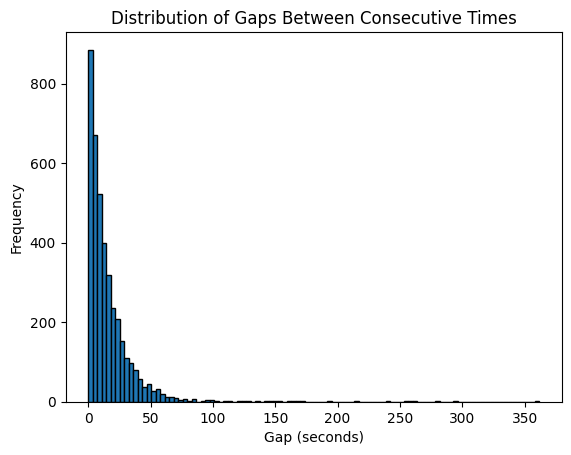

In [ ]:
df['RSST'] = df['RSST'] * 1000000
df = df.sort_values(by='RSST').reset_index(drop=True)

# Calculate the gaps between consecutive times
df['gap'] = df['RSST'].diff()

# Plot the distribution of the gaps
plt.hist(df['gap'].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of Gaps Between Consecutive Times')
plt.xlabel('Gap (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Step 4: Plot the index on the x-axis and the gaps on the y-axis
plt.plot(df.index[1:], df['gap'][1:], marker='o')
plt.title('Gaps Between Consecutive Times')
plt.xlabel('Index')
plt.ylabel('Gap (ps)')
plt.show()

0      1970-01-01 00:00:02.600000000
1      1970-01-01 00:00:13.900000000
2      1970-01-01 00:00:14.399999999
3      1970-01-01 00:01:11.600000000
4      1970-01-01 00:01:29.900000000
                    ...             
3995   1970-01-01 18:04:04.599999999
3996   1970-01-01 18:05:47.000000000
3997   1970-01-01 18:10:01.100000000
3998   1970-01-01 18:10:55.899999999
3999   1970-01-01 18:11:24.299999999
Name: RSST, Length: 4000, dtype: datetime64[ns]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

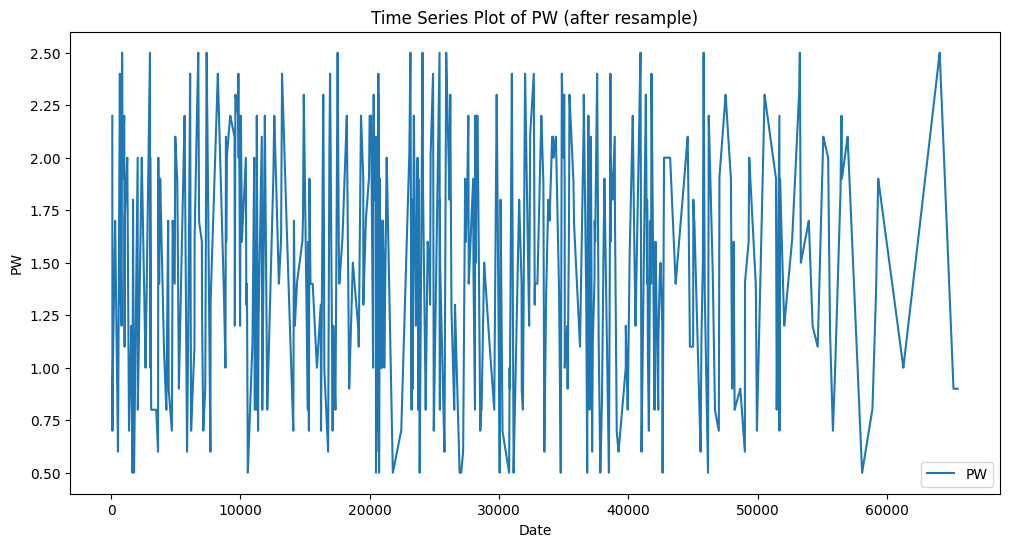

In [ ]:
df['RSST'] = pd.to_datetime(df['RSST'], unit='s')

print(df['RSST'])

# Set 'RSST' as the index
df.set_index('RSST', inplace=True)
#df.drop('RSST', axis=1, inplace=True)

# Plot the time series
plt.clf()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PW'], label='PW')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Time Series Plot of PW (before)')
plt.legend()
plt.show()

# Remove duplicate indices
df = df[~df.index.duplicated(keep='first')]

df = df.resample('1s').interpolate(method = 'linear')

df.reset_index(inplace=True)

# Plot the distribution of the gaps
plt.hist(df['gap'].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of Gaps Between Consecutive Times before resampling')
plt.xlabel('Gap (ps)')
plt.ylabel('Frequency')
plt.show()

# Plot the time series
plt.clf()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PW'], label='PW')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Time Series Plot of PW (after resample)')
plt.legend()
plt.show()

# Calculate the gaps between consecutive times
df['gap'] = df['RSST'].diff().dt.total_seconds()

# Plot the distribution of the gaps
plt.hist(df['gap'].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of Gaps Between Consecutive Times after resampling')
plt.xlabel('Gap (ps)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.drop('gap', axis=1, inplace=True)
print(df)

                     RSST   PW     PPS   PPB           APW       RSCF   SNR
0     1970-01-01 00:00:02  NaN     NaN   NaN           NaN        NaN   NaN
1     1970-01-01 00:00:03  NaN     NaN   NaN           NaN        NaN   NaN
2     1970-01-01 00:00:04  NaN     NaN   NaN           NaN        NaN   NaN
3     1970-01-01 00:00:05  NaN     NaN   NaN           NaN        NaN   NaN
4     1970-01-01 00:00:06  NaN     NaN   NaN           NaN        NaN   NaN
...                   ...  ...     ...   ...           ...        ...   ...
65478 1970-01-01 18:11:20  0.9  1080.0  15.0  9.000000e-07 -3384503.0  14.0
65479 1970-01-01 18:11:21  0.9  1080.0  15.0  9.000000e-07 -3384503.0  14.0
65480 1970-01-01 18:11:22  0.9  1080.0  15.0  9.000000e-07 -3384503.0  14.0
65481 1970-01-01 18:11:23  0.9  1080.0  15.0  9.000000e-07 -3384503.0  14.0
65482 1970-01-01 18:11:24  0.9  1080.0  15.0  9.000000e-07 -3384503.0  14.0

[65483 rows x 7 columns]


# Data Analysis (EDA)

<Figure size 640x480 with 0 Axes>

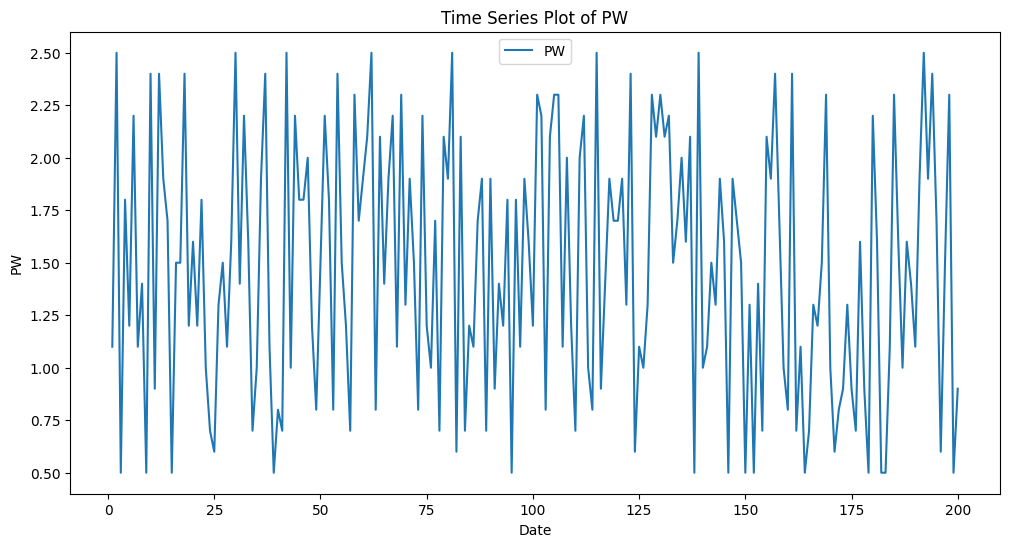

In [ ]:
#======================
# Visualizing
#======================
import matplotlib.pyplot as plt

# Plot the time series
plt.clf()
plt.figure(figsize=(12, 6))
plt.plot(df.index[:200], df['PW'][:200], label='PW')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Time Series Plot of PW')
plt.legend()
plt.show()

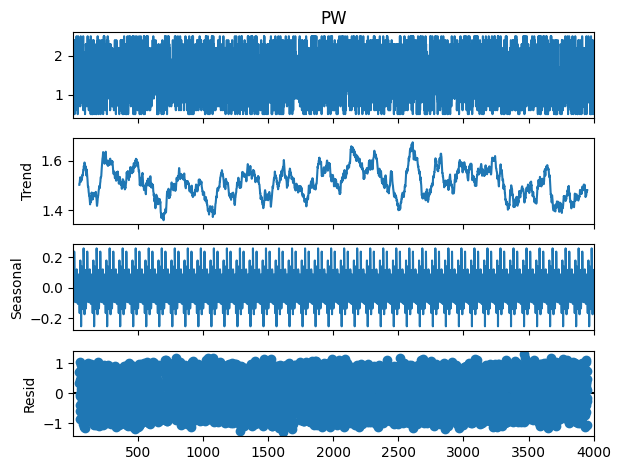

'\nThere seems to be some seasonality when period set to higher amounts\n'

In [ ]:
#======================
# Decomposition
#======================
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['PW'], model='additive', period=100)
decomposition.plot()
plt.show()

"""
There seems to be some seasonality when period set to higher amounts
"""

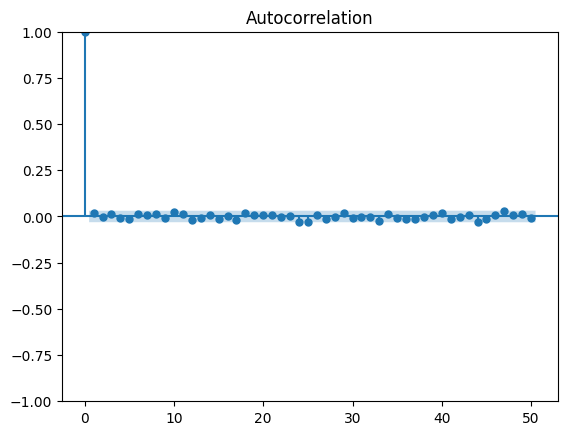

'\nCompares the correlation of the time series with itself at different lags.\nAt lag=0, ofc correlation is full since its comparing to itself\nseems there is barely any correlation at lag >= 1.\n'

In [ ]:
#======================
# Autocorrelation Function
#======================
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function
plot_acf(df['PW'], lags=50)
plt.show()

"""
Compares the correlation of the time series with itself at different lags.
At lag=0, ofc correlation is full since its comparing to itself
seems there is barely any correlation at lag >= 1.
"""

In [ ]:
#====================================
# Augmented Dickey-Fuller Test
#====================================
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['PW'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

"""
ADF statistic is a negative number. The more negative it is, the stronger the evidence against the null hypothesis (that the series is non-stationary).
p-value is the probability of observing the test results under the null hypothesis. A lower p-value indicates stronger evidence against the null hypothesis.

Since the p-value is 0.0 (which is significantly less than common significance levels such as 0.05 or 0.01), we reject the null hypothesis.
The very negative ADF statistic further supports rejecting the null hypothesis.
based on the ADF test results, we can conclude that the time series is stationary --> its statistical properties are constant over time.
"""

ADF Statistic: -62.19632370528585
p-value: 0.0


'\nADF statistic is a negative number. The more negative it is, the stronger the evidence against the null hypothesis (that the series is non-stationary).\np-value is the probability of observing the test results under the null hypothesis. A lower p-value indicates stronger evidence against the null hypothesis.\n\nSince the p-value is 0.0 (which is significantly less than common significance levels such as 0.05 or 0.01), we reject the null hypothesis.\nThe very negative ADF statistic further supports rejecting the null hypothesis.\nbased on the ADF test results, we can conclude that the time series is stationary --> its statistical properties are constant over time.\n'

            PW       PPS       PPB       APW      RSCF      RSST       SNR
PW    1.000000  0.017450  0.001399  1.000000  0.003341  0.013274  0.030753
PPS   0.017450  1.000000  0.005866  0.017450 -0.003811  0.038170  0.000385
PPB   0.001399  0.005866  1.000000  0.001399  0.007870 -0.240218  0.003269
APW   1.000000  0.017450  0.001399  1.000000  0.003341  0.013274  0.030753
RSCF  0.003341 -0.003811  0.007870  0.003341  1.000000  0.026009  0.018608
RSST  0.013274  0.038170 -0.240218  0.013274  0.026009  1.000000  0.023334
SNR   0.030753  0.000385  0.003269  0.030753  0.018608  0.023334  1.000000


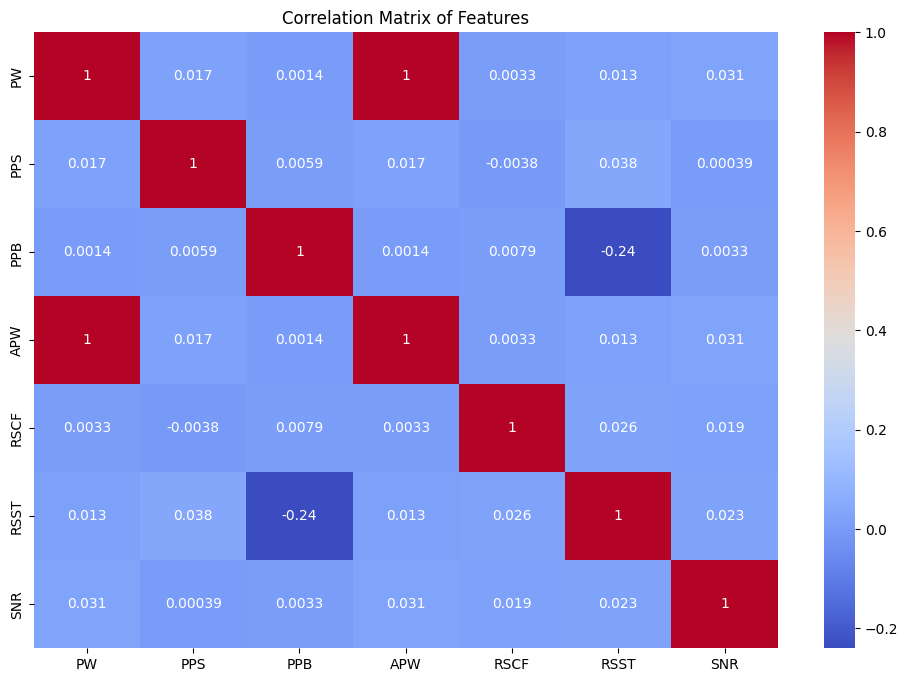

In [ ]:
#====================================
# Corelation Matrix
#====================================
import seaborn as sns

features = [col for col in df.columns]

# Create correlation matrix
correlation_matrix = df[features].corr()
print(correlation_matrix)

# Optional: Plot the correlation matrix
plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix of Features')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Smoothing Data (Feature Engineering)

In [ ]:
window_length = 400
#====================================
# Moving Average
#====================================
moving_avg_window = 10
df['moving_average'] = df['PW'].rolling(window=moving_avg_window).mean()

plt.figure(figsize=(10, 6))
# title of plot
plt.title('Moving Average Smoothing of PW (k=10)')
plt.xlabel('Time (in ms)')
plt.ylabel('PW')
plt.plot(df.index[:window_length], df['PW'][:window_length], label='Original')
plt.plot(df.index[:window_length], df['moving_average'][:window_length], label='Moving Average', color='red')
plt.legend()
plt.show()

In [ ]:
#=================================================================
# Exponential Smoothing (to give more weight to recent observations)
#=================================================================
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alpha = 0.035
model = SimpleExpSmoothing(df['PW'])
fit = model.fit(smoothing_level=alpha, optimized=False)
df['exp_smoothing'] = fit.fittedvalues

plt.figure(figsize=(10, 6))
plt.title('Exponential Smoothing of PW (a=0.2)')
plt.xlabel('Time (in ms)')
plt.ylabel('PW')
plt.plot(df.index[:window_length], df['PW'][:window_length], label='Original')
plt.plot(df.index[:window_length], df['exp_smoothing'][:window_length], label='Exponential Smoothing', color='red')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


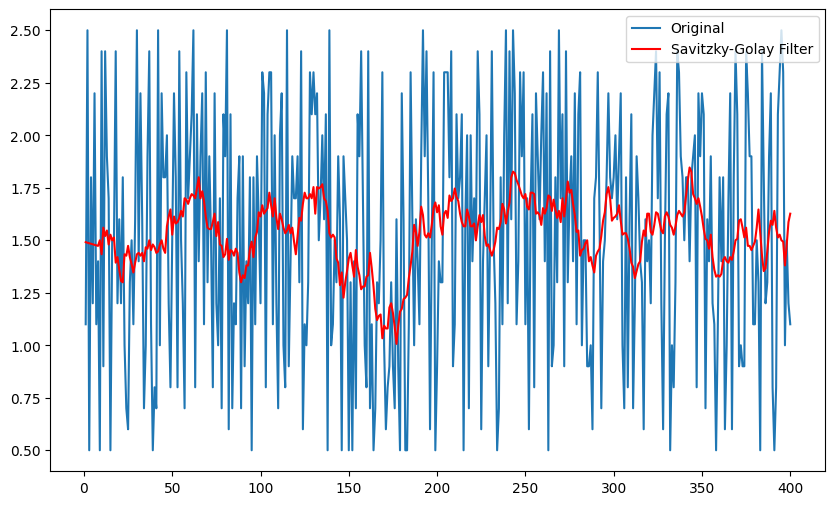

In [ ]:
#==================================
# Savitzky-Golay Filter
#==================================
from scipy.signal import savgol_filter

df['savgol_filter'] = savgol_filter(df['PW'], window_length=15, polyorder=1)

plt.figure(figsize=(10, 6))
plt.plot(df.index[:window_length], df['PW'][:window_length], label='Original')
plt.plot(df.index[:window_length], df['savgol_filter'][:window_length], label='Savitzky-Golay Filter', color='red')
plt.legend()
plt.show()

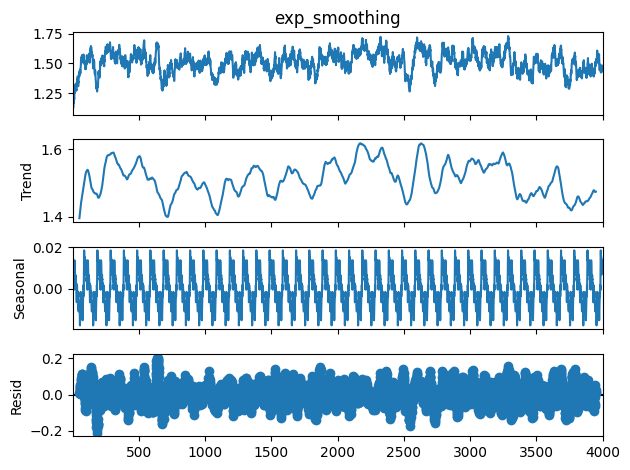

'\nThere seems to be some seasonality when period set to higher amounts\n'

In [ ]:
#======================
# Decomposition
#======================
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['exp_smoothing'], model='additive', period=100)
decomposition.plot()
plt.show()

"""
There seems to be some seasonality when period set to higher amounts
"""

# Univariate LSTM (predicting smoothed data)

In [ ]:
main_column = 'PW' #'PW', 'savgol_filter', 'moving_average', 'exp_smoothing'
# Define the size of the training set
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Separate the target variable
train_values = train[main_column].values.reshape(-1, 1)
test_values = test[main_column].values.reshape(-1, 1)

lookback=10 # used to create sequences
# Plot of testing set
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test['PW'][lookback:][:50], label='Testing points')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Actual Testing time-series')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_values)
test_scaled = scaler.transform(test_values)

if main_column == 'moving_average':
  train_scaled = train_scaled[moving_avg_window-1:]
  print(train_scaled[0]) # should not be nan
print(train_scaled.shape)
print(test_scaled.shape)

(3200, 1)
(800, 1)


In [ ]:
def create_sequences(data, lookback):
    xs, ys = [], []
    for i in range(len(data) - lookback):
        x = data[i : i + lookback]
        y = data[i + lookback]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lookback = 10
X_train, y_train = create_sequences(train_scaled, lookback)
X_test, y_test = create_sequences(test_scaled, lookback)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.2)

Epoch 1/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 0.1486 - val_loss: 0.0931
Epoch 2/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0992 - val_loss: 0.0913
Epoch 3/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0952 - val_loss: 0.0908
Epoch 4/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0920 - val_loss: 0.0974
Epoch 5/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0932 - val_loss: 0.0905
Epoch 6/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0929 - val_loss: 0.0913
Epoch 7/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0917 - val_loss: 0.0915
Epoch 8/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0900 - val_loss: 0.0903
Epoch 9/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0926 - val_loss: 0.0902
Epoch 10/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0904 - val_loss: 0.0903
Epoch 11/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0912 - val_loss: 0.0906
Epoch 12/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.

In [ ]:
from sklearn.metrics import mean_squared_error

# Generate predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual test set values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Fixed plot
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test[main_column][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions[:50], label='Predicted with Residuals', color='green')
plt.xlabel('Time')
plt.ylabel('PW')
plt.title('Univariate LSTM Model Predictions vs Actual')
plt.legend()
plt.show()

# Dynamic plot
import plotly.graph_objs as go

len_predictions = len(predictions)

fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test[main_column][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions.flatten(),
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='Univariate LSTM Model Predictions with Residuals vs Actual (smoothed)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test['PW'][lookback:], predictions)
print(f'Mean Squared Error (MSE): {mse}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Mean Squared Error (MSE): 0.3655220846497996


Notice: when the black line is going down and then starts going up, the green line still goes down for a timestep, but then sees the previous black line going up and so it starts going up too

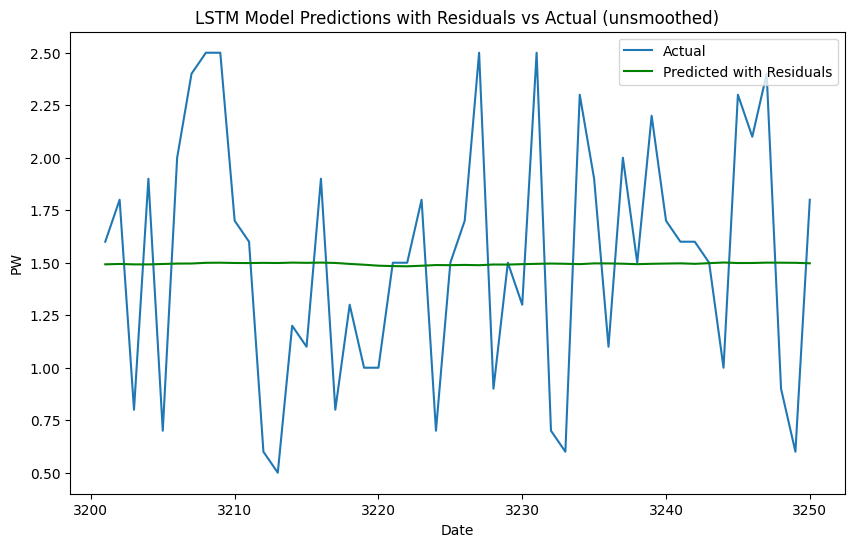

Mean Squared Error (MSE): 0.3655220846497996


In [ ]:
# Align residuals with test predictions
test_residuals = df['PW'][train_size + lookback:] - df[main_column][train_size + lookback:] #train_size+lookback: -> test section

# Add residuals to the predictions
predictions_with_residuals = predictions.flatten() + test_residuals.values[:len_predictions]

# Fixed plot
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test['PW'][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions_with_residuals[:50], label='Predicted with Residuals', color='green')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('LSTM Model Predictions with Residuals vs Actual (unsmoothed)')
plt.legend()
plt.show()

# Interactive plot
fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test['PW'][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions_with_residuals.flatten(),
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='LSTM Model Predictions with Residuals vs Actual (unsmoothed)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test['PW'][lookback:], predictions_with_residuals)
print(f'Mean Squared Error (MSE): {mse}')

image.png

Note: The previous code predicts the next timestep's PW using the past 10 timestep data (lookback)

# Multivariate LSTM (predicting original values)

In [ ]:
main_column = 'exp_smoothing'
print(df.columns)
columns_to_exclude = {'moving_average', 'exp_smoothing', 'savgol_filter'} - {main_column}
#features = [col for col in df.columns if col != 'PW' and col not in columns_to_exclude]
features = [col for col in df.columns if col not in columns_to_exclude]
print(features)
target = "PW"
# Define the size of the training set
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Separate the features and target
train_features = train[features]
test_features = test[features]
train_target = train[target].values.reshape(-1, 1)
test_target = test[target].values.reshape(-1, 1)

Index(['PW', 'PPS', 'PPB', 'APW', 'RSCF', 'RSST', 'SNR', 'moving_average',
       'exp_smoothing', 'savgol_filter'],
      dtype='object')
['PW', 'PPS', 'PPB', 'APW', 'RSCF', 'RSST', 'SNR', 'exp_smoothing']


In [ ]:
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)
train_target_scaled = scaler_target.fit_transform(train_target)
test_target_scaled = scaler_target.transform(test_target)

In [ ]:
def create_sequences(features, target, lookback):
    xs, ys = [], []
    for i in range(len(features) - lookback):
        x = features[i:i + lookback]
        y = target[i + lookback]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lookback = 10
X_train, y_train = create_sequences(train_features_scaled, train_target_scaled, lookback)
X_test, y_test = create_sequences(test_features_scaled, test_target_scaled, lookback)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(units=85, return_sequences=True), input_shape=(lookback, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=85, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=85, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=85, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 37s 138ms/step - loss: 0.1275 - val_loss: 0.0905
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0961 - val_loss: 0.0903
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - loss: 0.0927 - val_loss: 0.0922
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0920 - val_loss: 0.0905
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - loss: 0.0909 - val_loss: 0.0953


In [ ]:
# Generate predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler_target.inverse_transform(predictions)

# Align residuals with test predictions
test_residuals = df['PW'][train_size + lookback:] - df[main_column][train_size + lookback:] #train_size+lookback: -> test section

# Add residuals to the predictions
predictions_with_residuals = predictions.flatten() + test_residuals.values[:len(predictions)]

# Fixed plot
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test["PW"][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions[:50], label='Predicted with Residuals', color='green')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions vs Actual (smoothed)')
plt.legend()
plt.show()

# Dynamic plot
import plotly.graph_objs as go

len_predictions = len(predictions)

fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test["PW"][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions.flatten(),
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='Multivariate LSTM Model Predictions vs Actual (smoothed)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test[main_column][lookback:], predictions)
print(f'Mean Squared Error (MSE): {mse}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step


Mean Squared Error (MSE): 0.02303439084960721


Note: The above LSTM is prone to either overfit to the data (when ran for many epochs) or otherwise produce data points close to the mean of the actual time series data.

# Multivariate LSTM (predicting smoothed data- using moving average)

In [ ]:
main_column = 'moving_average'
print(df.columns)
columns_to_exclude = {'moving_average', 'exp_smoothing', 'savgol_filter'} - {main_column}
features = [col for col in df.columns if col != 'PW' and col not in columns_to_exclude]
print(features)
target = main_column

# Define the size of the training set
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

if main_column == 'moving_average':
  train = train[moving_avg_window-1:]
  print(train['moving_average']) # should not be nan

# Separate the features and target
train_features = train[features]
test_features = test[features]
train_target = train[target].values.reshape(-1, 1)
test_target = test[target].values.reshape(-1, 1)

Index(['PW', 'PPS', 'PPB', 'APW', 'RSCF', 'RSST', 'SNR', 'moving_average',
       'exp_smoothing', 'savgol_filter'],
      dtype='object')
['PPS', 'PPB', 'APW', 'RSCF', 'RSST', 'SNR', 'moving_average']
time
10      1.47
11      1.45
12      1.44
13      1.58
14      1.57
        ... 
3196    1.56
3197    1.57
3198    1.55
3199    1.58
3200    1.69
Name: moving_average, Length: 3191, dtype: float64


In [ ]:
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)
train_target_scaled = scaler_target.fit_transform(train_target)
test_target_scaled = scaler_target.transform(test_target)

In [ ]:
def create_sequences(features, target, lookback):
    xs, ys = [], []
    for i in range(len(features) - lookback):
        x = features[i:i + lookback]
        y = target[i + lookback]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lookback = 10
X_train, y_train = create_sequences(train_features_scaled, train_target_scaled, lookback)
X_test, y_test = create_sequences(test_features_scaled, test_target_scaled, lookback)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional

if quick_run:
  model = Sequential()
  model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(LSTM(units=50, return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))
else:
  model = Sequential()
  model.add(Bidirectional(LSTM(units=85, return_sequences=True), input_shape=(lookback, X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(Bidirectional(LSTM(units=85, return_sequences=True)))
  model.add(Dropout(0.2))
  model.add(Bidirectional(LSTM(units=85, return_sequences=True)))
  model.add(Dropout(0.2))
  model.add(Bidirectional(LSTM(units=85, return_sequences=False)))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.2)

Epoch 1/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0604 - val_loss: 0.0093
Epoch 2/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0100 - val_loss: 0.0052
Epoch 3/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 4/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0064 - val_loss: 0.0041
Epoch 5/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0057 - val_loss: 0.0035
Epoch 6/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 7/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 8/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 9/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049 - val_loss: 0.0036
Epoch 10/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 11/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 12/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

In [ ]:
# Generate predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler_target.inverse_transform(predictions)

# Fixed plot
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test[main_column][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions[:50], label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions vs Actual (smoothed)')
plt.legend()
plt.show()

# Dynamic plot
len_predictions = len(predictions)

fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test[main_column][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions.flatten(),
    mode='lines',
    name='Predicted',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='Multivariate LSTM Model Predictions vs Actual (smoothed)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test[main_column][lookback:], predictions)
print(f'Mean Squared Error (MSE): {mse}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


Mean Squared Error (MSE): 0.004873783633243489


In [ ]:
# Align residuals with test predictions
test_residuals = df['PW'][train_size + lookback:] - df[main_column][train_size + lookback:] #train_size+lookback: -> test section

# Add residuals to the predictions
predictions_with_residuals = predictions.flatten() + test_residuals.values[:len(predictions)]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test['PW'][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions_with_residuals[:50], label='Predicted with Residuals', color='green')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions with Residuals vs Actual (smoothed)')
plt.legend()
plt.show()

# Interactive plot
fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test['PW'][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions_with_residuals.flatten(),
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='Multivariate LSTM Model Predictions with Residuals vs Actual (smoothed)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test['PW'][lookback:], predictions_with_residuals)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.004873783633243489


i=0
SMOOTHED PREDICTION=[1.5001689], SMOOTHED ACTUAL=1.55
x = [1.5001689] * 10 - sum[Series([], Name: PW, dtype: float64)]
x = [1.5001689] * 10 - 0
1.5999999999999999 = [15.001689]
------------------------
i=1
SMOOTHED PREDICTION=[1.4880747], SMOOTHED ACTUAL=1.49
x = [1.4880747] * 10 - sum[time
3211    1.6
Name: PW, dtype: float64]
x = [1.4880747] * 10 - 1.5999999999999999
1.7999999999999998 = [13.280746]
------------------------
i=2
SMOOTHED PREDICTION=[1.5140737], SMOOTHED ACTUAL=1.4300000000000002
x = [1.5140737] * 10 - sum[time
3211    1.6
3212    1.8
Name: PW, dtype: float64]
x = [1.5140737] * 10 - 3.3999999999999995
0.7999999999999999 = [11.740738]
------------------------
i=3
SMOOTHED PREDICTION=[1.4955368], SMOOTHED ACTUAL=1.49
x = [1.4955368] * 10 - sum[time
3211    1.6
3212    1.8
3213    0.8
Name: PW, dtype: float64]
x = [1.4955368] * 10 - 4.199999999999999
1.9 = [10.755368]
------------------------
i=4
SMOOTHED PREDICTION=[1.5788134], SMOOTHED ACTUAL=1.5
x = [1.5788134] * 1

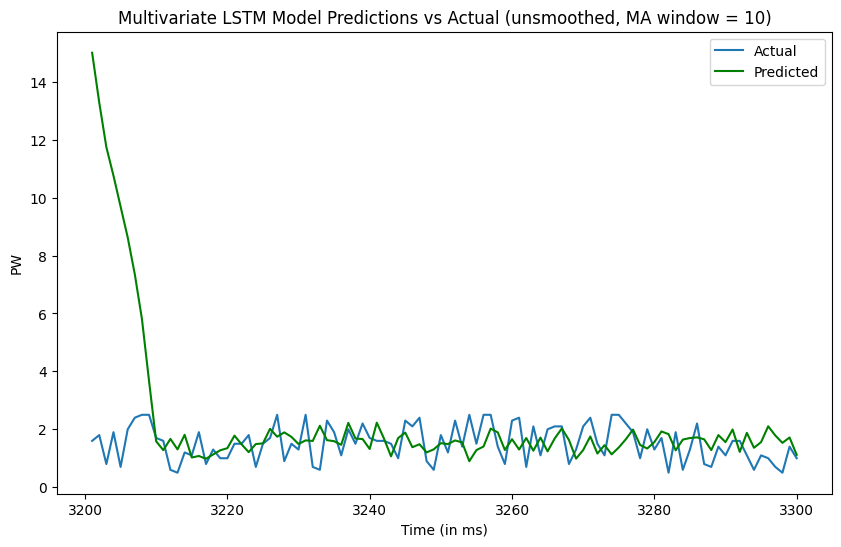

'\n**Since you are multiplying the smoothed prediction by moving_avg_window, the higher than avg window, the more signficant the smoothed prediction error\n'

In [ ]:
# Moving Average Unsmoothed Extrapolation
# will only work if smoothed predictions are near perfect
smoothed_predictions = predictions
smoothed_actual = test[main_column][lookback:lookback + len_predictions]
unsmoothed_actual = df['PW'][train_size + lookback:]
unsmoothed_predictions = []

for i in range(len(predictions)):

  if i < 50:
    print(f'i={i}')
    print(f'SMOOTHED PREDICTION={smoothed_predictions[i]}, SMOOTHED ACTUAL={smoothed_actual.iloc[i]}')
    print(f'x = {smoothed_predictions[i]} * {moving_avg_window} - sum[{unsmoothed_actual[max(0, i-moving_avg_window+1):i]}]')
    print(f'x = {smoothed_predictions[i]} * {moving_avg_window} - {sum(unsmoothed_actual[max(0, i-moving_avg_window-1):i])}')
    print(f'{unsmoothed_actual.iloc[i]} = {smoothed_predictions[i] * moving_avg_window - sum(unsmoothed_actual[max(0, i-moving_avg_window-1):i])}')
    print("------------------------")

  unsmoothed_predictions.append(smoothed_predictions[i] * moving_avg_window - sum(unsmoothed_actual[max(0, i-moving_avg_window+1):i]))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test.index[:100], unsmoothed_actual[:100], label='Actual')
plt.plot(test.index[:100], unsmoothed_predictions[:100], label='Predicted', color='green')
plt.xlabel('Time (in ms)')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions vs Actual (unsmoothed, MA window = 10)')
plt.legend()
plt.show()

"""
**Since you are multiplying the smoothed prediction by moving_avg_window, the higher than avg window, the more signficant the smoothed prediction error
"""

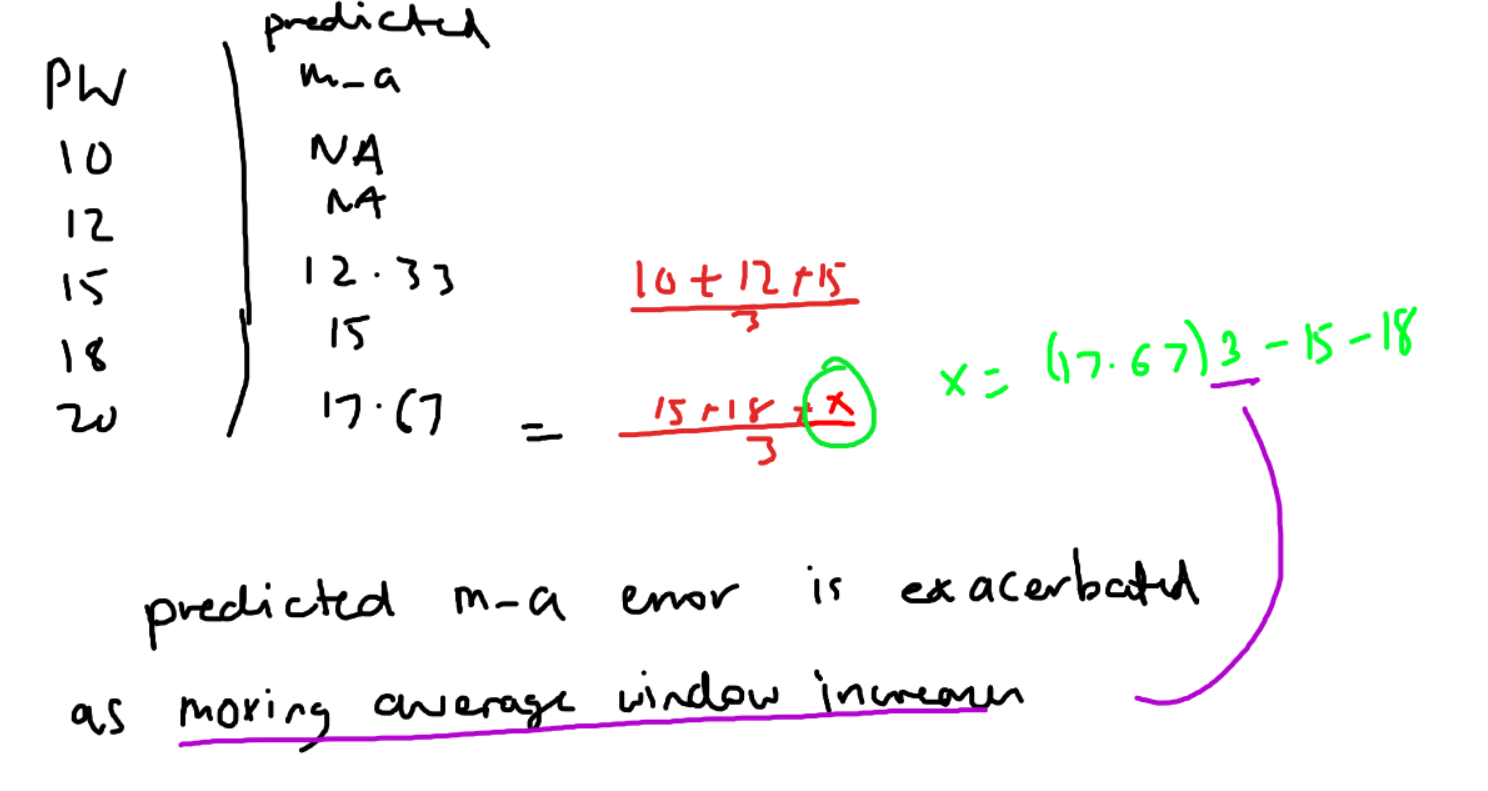

# Multivariate LSTM (predicting smoothed data- using exp smoothing)

In [ ]:
main_column = 'exp_smoothing'
print(df.columns)
columns_to_exclude = {'moving_average', 'exp_smoothing', 'savgol_filter'} - {main_column}
features = [col for col in df.columns if col != 'PW' and col not in columns_to_exclude]
print(features)
target = main_column

# Define the size of the training set
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Separate the features and target
train_features = train[features]
test_features = test[features]
train_target = train[target].values.reshape(-1, 1)
test_target = test[target].values.reshape(-1, 1)

Index(['PW', 'PPS', 'PPB', 'APW', 'RSCF', 'RSST', 'SNR', 'moving_average',
       'exp_smoothing', 'savgol_filter'],
      dtype='object')
['PPS', 'PPB', 'APW', 'RSCF', 'RSST', 'SNR', 'exp_smoothing']


In [ ]:
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)
train_target_scaled = scaler_target.fit_transform(train_target)
test_target_scaled = scaler_target.transform(test_target)

In [ ]:
def create_sequences(features, target, lookback):
    xs, ys = [], []
    for i in range(len(features) - lookback):
        x = features[i:i + lookback]
        y = target[i + lookback]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lookback = 10
X_train, y_train = create_sequences(train_features_scaled, train_target_scaled, lookback)
X_test, y_test = create_sequences(test_features_scaled, test_target_scaled, lookback)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.2)

Epoch 1/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0608 - val_loss: 0.0104
Epoch 2/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0118 - val_loss: 0.0046
Epoch 3/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0071 - val_loss: 0.0024
Epoch 4/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 5/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - val_loss: 9.4443e-04
Epoch 6/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - val_loss: 6.5587e-04
Epoch 7/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030 - val_loss: 4.7667e-04
Epoch 8/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028 - val_loss: 3.6057e-04
Epoch 9/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 10/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - val_loss: 2.1508e-04
Epoch 11/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - val_loss: 2.5249e-04
Epoch 12/35
80/80 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Generate predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler_target.inverse_transform(predictions)

# Fixed plot
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test[main_column][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions[:50], label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions vs Actual (smoothed)')
plt.legend()
plt.show()

# Dynamic plot
len_predictions = len(predictions)

fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test[main_column][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions.flatten(),
    mode='lines',
    name='Predicted',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='Multivariate LSTM Model Predictions vs Actual (smoothed)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test[main_column][lookback:], predictions)
print(f'Mean Squared Error (MSE): {mse}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


Mean Squared Error (MSE): 0.00013373303610287191


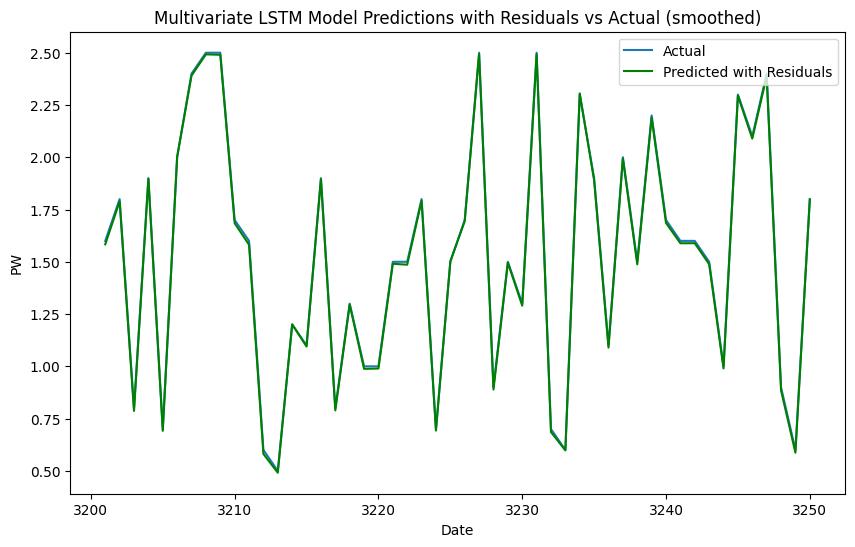

Mean Squared Error (MSE): 0.000133733036102872


In [ ]:
# Align residuals with test predictions
test_residuals = df['PW'][train_size + lookback:] - df[main_column][train_size + lookback:] #train_size+lookback: -> test section

# Add residuals to the predictions
predictions_with_residuals = predictions.flatten() + test_residuals.values[:len(predictions)]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test['PW'][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions_with_residuals[:50], label='Predicted with Residuals', color='green')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions with Residuals vs Actual (smoothed)')
plt.legend()
plt.show()

# Interactive plot
fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test['PW'][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions_with_residuals.flatten(),
    mode='lines',
    name='Predicted with Residuals',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='Multivariate LSTM Model Predictions with Residuals vs Actual (smoothed)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test['PW'][lookback:], predictions_with_residuals)
print(f'Mean Squared Error (MSE): {mse}')

In [ ]:
# Exponential Smoothing Unsmoothed Extrapolation
smoothed_predictions = predictions
smoothed_actual = test[main_column][lookback:lookback + len_predictions]
unsmoothed_actual = df['PW'][train_size + lookback:]
unsmoothed_predictions = []

for i in range(len(predictions)-1):

  if i < 50:
    print(f'i={i}')
    print(f'SMOOTHED PREDICTION={smoothed_predictions[i]}, SMOOTHED ACTUAL={smoothed_actual.iloc[i]}')
    print(f'x = ({smoothed_predictions[i]} - (1-{alpha})*{smoothed_predictions[i-1]})/{alpha}')
    print(f'{unsmoothed_actual.iloc[i]} = ({smoothed_predictions[i]} - (1-{alpha})*{smoothed_predictions[i-1]})/{alpha}')
    print(f'{unsmoothed_actual.iloc[i]} = {smoothed_predictions[i] - (1 - alpha) * smoothed_predictions[i - 1]/alpha}')
    print("------------------------")

  unsmoothed_predictions.append((smoothed_predictions[i+1] - (1 - alpha) * smoothed_predictions[i])/alpha)
  print(f'{unsmoothed_actual.iloc[i]}, {unsmoothed_predictions[i]}')

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test.index[:100], unsmoothed_actual[:100], label='Actual')
plt.plot(test.index[:100], unsmoothed_predictions[:100], label='Predicted', color='green')
plt.xlabel('Time (in ms)')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions vs Actual (unsmoothed, a=0.2)')
plt.legend()
plt.show()

i=0
SMOOTHED PREDICTION=[1.5820187], SMOOTHED ACTUAL=1.5985380986276223
x = ([1.5820187] - (1-0.1)*[1.4389112])/0.1
1.5999999999999999 = ([1.5820187] - (1-0.1)*[1.4389112])/0.1
1.5999999999999999 = [-11.368182]
------------------------
1.5999999999999999, [1.6388214]
i=1
SMOOTHED PREDICTION=[1.5876989], SMOOTHED ACTUAL=1.59868428876486
x = ([1.5876989] - (1-0.1)*[1.5820187])/0.1
1.7999999999999998 = ([1.5876989] - (1-0.1)*[1.5820187])/0.1
1.7999999999999998 = [-12.650469]
------------------------
1.7999999999999998, [1.7670548]
i=2
SMOOTHED PREDICTION=[1.6056345], SMOOTHED ACTUAL=1.618815859888374
x = ([1.6056345] - (1-0.1)*[1.5876989])/0.1
0.7999999999999999 = ([1.6056345] - (1-0.1)*[1.5876989])/0.1
0.7999999999999999 = [-12.683655]
------------------------
0.7999999999999999, [0.8907664]
i=3
SMOOTHED PREDICTION=[1.5341476], SMOOTHED ACTUAL=1.5369342738995366
x = ([1.5341476] - (1-0.1)*[1.6056345])/0.1
1.9 = ([1.5341476] - (1-0.1)*[1.6056345])/0.1
1.9 = [-12.916562]
------------------

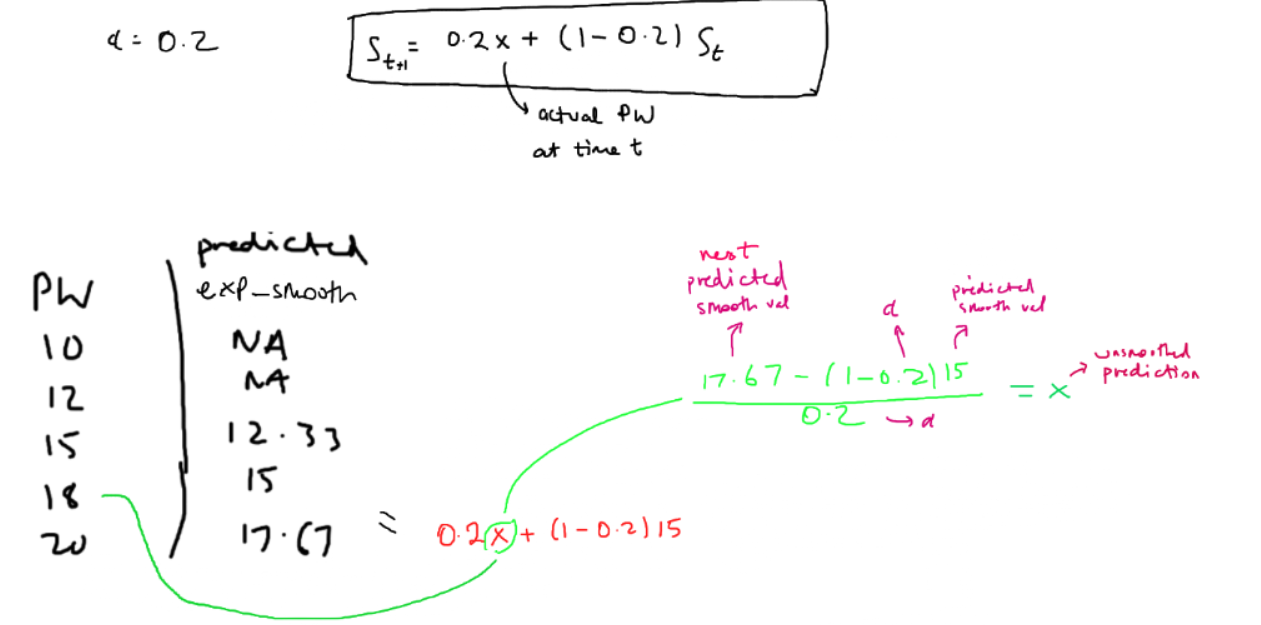

# ARIMA

<Figure size 640x480 with 0 Axes>

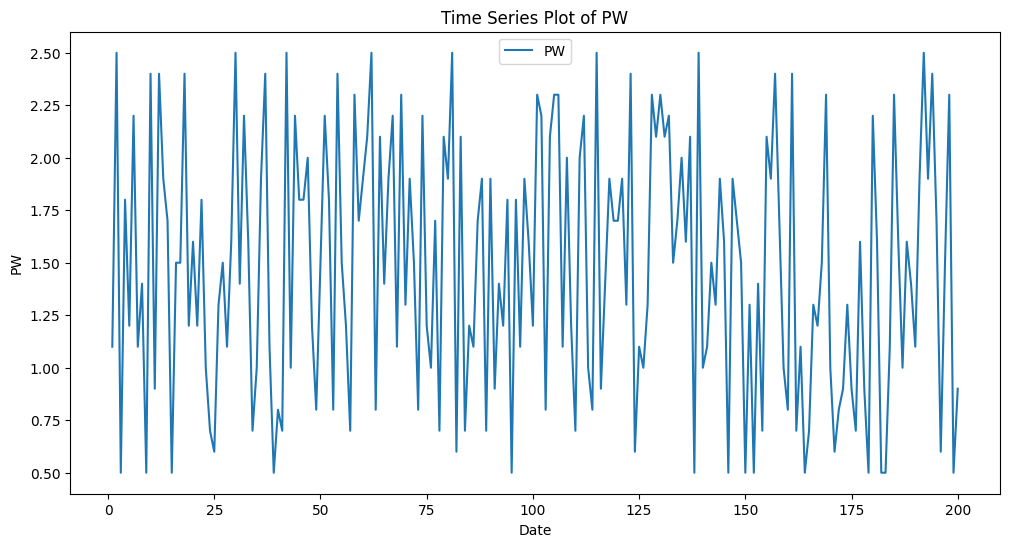

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                     PW   No. Observations:                 4000
Model:                ARIMA(10, 1, 5)   Log Likelihood               -3632.427
Date:                Mon, 26 Aug 2024   AIC                           7296.854
Time:                        04:48:04   BIC                           7397.555
Sample:                             0   HQIC                          7332.550
                               - 4000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5423      0.100    -15.418      0.000      -1.738      -1.346
ar.L2         -1.9373      0.160    -12.098      0.000      -2.251      -1.623
ar.L3         -1.3978      0.151     -9.230      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


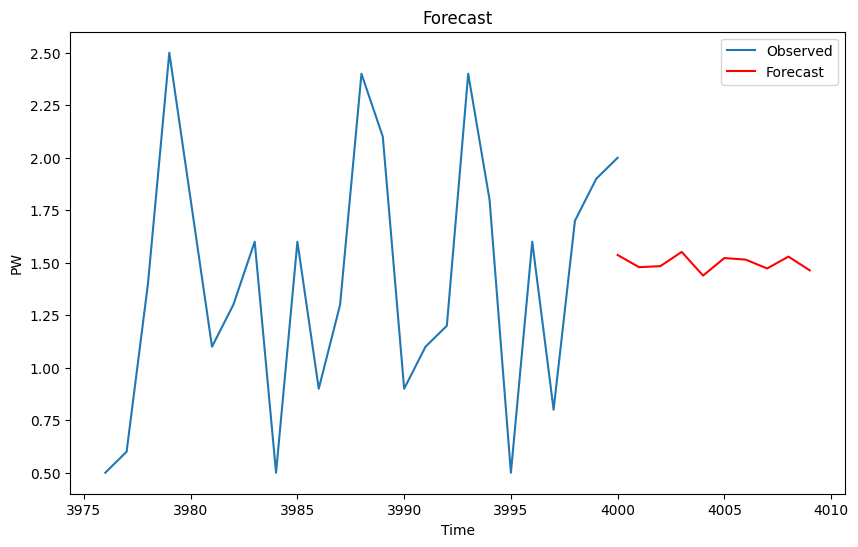

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Plot the time series
plt.clf()
plt.figure(figsize=(12, 6))
plt.plot(df.index[:200], df['PW'][:200], label='PW')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Time Series Plot of PW')
plt.legend()
plt.show()

# Create and fit the ARIMA model
model = ARIMA(df['PW'], order=(10, 1, 5))  # replace (p, d, q) with appropriate values
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index=[]
for x in range(forecast_steps):
  forecast_index.append(x+df.index[-1])
#forecast_index = df.index[-1] + forecast_steps

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index[-25:], df['PW'][-25:], label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Forecast')
plt.xlabel('Time')
plt.ylabel('PW')
plt.legend()
plt.show()

In [ ]:
import itertools, warnings

# Split data into training and test sets
train_size = int(len(df) * 0.99)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ensure the 'test' set does not contain NaN values
test = test.dropna()

# Define the p, d, and q parameters to take any value between 0 and 3
p = d = q = range(0, 10)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Use grid search to find the optimal set of parameters based on AIC
best_aic = float("inf")
best_order = None

warnings.filterwarnings("ignore")

"""
GRID SEARCH CODE (runs for hours)
for param in pdq:
    try:
        model = ARIMA(train['PW'], order=param)
        results = model.fit()
        print(f'{param} -> {results.aic}')
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
    except:
        print('ARIMA{} - failed'.format(param))
        continue

print(f'Optimal ARIMA parameters: {best_order} with AIC: {best_aic}')
"""

"\nGRID SEARCH CODE\nfor param in pdq:\n    try:\n        model = ARIMA(train['PW'], order=param)\n        results = model.fit()\n        print(f'{param} -> {results.aic}')\n        if results.aic < best_aic:\n            best_aic = results.aic\n            best_order = param\n    except:\n        print('ARIMA{} - failed'.format(param))\n        continue\n\nprint(f'Optimal ARIMA parameters: {best_order} with AIC: {best_aic}')\n"

                               SARIMAX Results                                
Dep. Variable:                     PW   No. Observations:                 3960
Model:                ARIMA(10, 1, 5)   Log Likelihood               -3596.613
Date:                Mon, 26 Aug 2024   AIC                           7225.227
Time:                        04:48:55   BIC                           7325.767
Sample:                             0   HQIC                          7260.884
                               - 3960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3868      0.116    -11.934      0.000      -1.615      -1.159
ar.L2         -1.8420      0.151    -12.203      0.000      -2.138      -1.546
ar.L3         -1.2687      0.143     -8.876      0.0

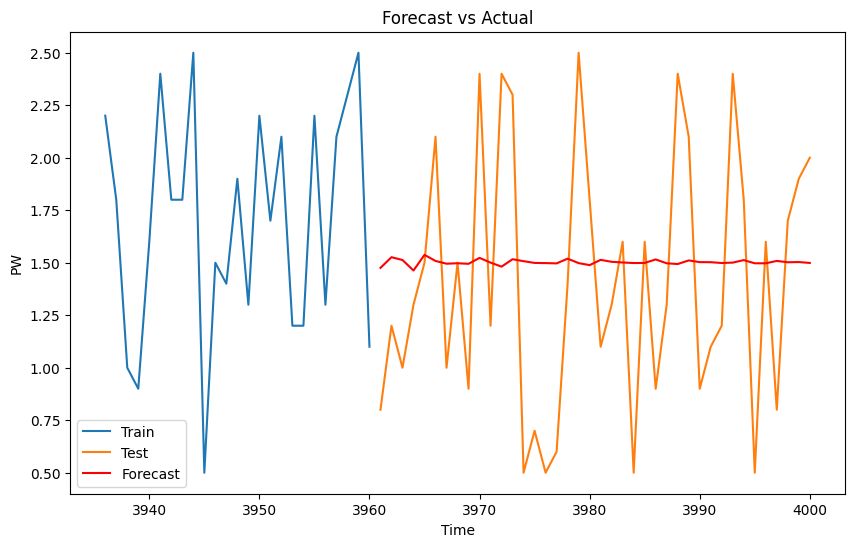

In [ ]:
# Fit the model with the optimal parameters
model = ARIMA(train['PW'], order=(10, 1, 5))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the test set
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

# Calculate MSE
mse = mean_squared_error(test['PW'], forecast)
print(f'Mean Squared Error: {mse}')

# Generate forecast index
forecast_index = test.index

# Plotting the observed and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index[-25:], train['PW'][-25:], label='Train')
plt.plot(test.index, test['PW'], label='Test')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('PW')
plt.legend()
plt.show()

# LSTM on Residuals

In [ ]:
# Set variables
lookback = 10
main_column = 'exp_smoothing'
df['residuals'] = df['PW'] - df[main_column]
columns_to_exclude = {'moving_average', 'exp_smoothing', 'savgol_filter'}
features = [col for col in df.columns if col != 'PW' and col not in columns_to_exclude]
print(features)
target = 'residuals'

# Define the size of the training set
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Separate the features and target
train_features = train[features]
test_features = test[features]
train_target = train[target].values.reshape(-1, 1)
test_target = test[target].values.reshape(-1, 1)

# Plot of testing set
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test[target][lookback:][:50], label='Testing points')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Actual Testing time-series')
plt.legend()
plt.show()

In [ ]:
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

train_features_scaled = scaler_features.fit_transform(train_features)
test_features_scaled = scaler_features.transform(test_features)
train_target_scaled = scaler_target.fit_transform(train_target)
test_target_scaled = scaler_target.transform(test_target)

In [ ]:
def create_sequences(features, target, lookback):
    xs, ys = [], []
    for i in range(len(features) - lookback):
        x = features[i:i + lookback]
        y = target[i + lookback]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X_train, y_train = create_sequences(train_features_scaled, train_target_scaled, lookback)
X_test, y_test = create_sequences(test_features_scaled, test_target_scaled, lookback)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.2)

In [ ]:
# Generate predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler_target.inverse_transform(predictions)

# Fixed plot
plt.figure(figsize=(10, 6))
plt.plot(test.index[:50], test[target][lookback:][:50], label='Actual')
plt.plot(test.index[:50], predictions[:50], label='Predicted with Residuals', color='green')
plt.xlabel('Date')
plt.ylabel('PW')
plt.title('Multivariate LSTM Model Predictions vs Actual (residuals)')
plt.legend()
plt.show()

# Dynamic plot
len_predictions = len(predictions)

fig = go.Figure()

# Actual values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=test[target][lookback:lookback + len_predictions],
    mode='lines',
    name='Actual'
))

# Predicted values plot
fig.add_trace(go.Scatter(
    x=test.index[lookback:lookback + len_predictions],
    y=predictions.flatten(),
    mode='lines',
    name='Predicted',
    line=dict(color='green')
))

# Update layout for slider and zoom functionality
fig.update_layout(
    title='Multivariate LSTM Model Predictions vs Actual (residuals)',
    xaxis_title='Time (picoseconds)',
    yaxis_title='PW',
    xaxis_rangeslider_visible=True,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
            ])
        ),
        type="linear"
    )
)

# Show the plot
fig.show()

# Calculate MSE
mse = mean_squared_error(test[main_column][lookback:], predictions)
print(f'Mean Squared Error (MSE): {mse}')

# k-step forecasting


In [ ]:
"""
The exp smoothing extrapolation method relies on 2 things: the current timestep smoothed pred and next timestep smoothed pred
To do multistep prediction of unsmoothed values of say 5 timesteps, we first predict 6 timesteps of smoothed values
Then we find 5 timesteps of unsmoothed values using exp smoothing extrapolation
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import StandardScaler

# Parameters
lookback = 100  # Number of past timesteps to use as input
n_future = 7  # Number of future timesteps to predict
alpha = 0.035    # Smoothing level for exponential smoothing

main_column = 'exp_smoothing'
print(df.columns)
columns_to_exclude = {'moving_average', 'exp_smoothing', 'savgol_filter', 'PPS', 'RSCF', 'RSST'}
features = [main_column] + [col for col in df.columns if col != 'PW' and col not in columns_to_exclude]
print(f'Features used: {features}')

trainX = []
trainY = []

df_for_training = df[features]
print(df_for_training.columns)

# Normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
print(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

for i in range(lookback, len(df_for_training_scaled) - n_future + 1):
  trainX.append(df_for_training_scaled[i - lookback:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Index(['PW', 'PPS', 'PPB', 'APW', 'RSCF', 'RSST', 'SNR', 'moving_average',
       'exp_smoothing', 'savgol_filter'],
      dtype='object')
Features used: ['exp_smoothing', 'PPB', 'APW', 'SNR']
Index(['exp_smoothing', 'PPB', 'APW', 'SNR'], dtype='object')
      exp_smoothing  PPB           APW  SNR
time                                       
1          1.100000   15  1.100000e-06   18
2          1.100000   25  2.500000e-06   20
3          1.149000   35  5.000000e-07   16
4          1.126285   35  1.800000e-06   16
5          1.149865   25  1.200000e-06   10
...             ...  ...           ...  ...
3996       1.449078   20  1.600000e-06   16
3997       1.454361   15  8.000000e-07   18
3998       1.431458   40  1.700000e-06   10
3999       1.440857   25  1.900000e-06   10
4000       1.456927   15  2.000000e-06   10

[4000 rows x 4 columns]
trainX shape == (3894, 100, 4).
trainY shape == (3894, 1).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(trainX, trainY, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 204ms/step - loss: 0.4767 - val_loss: 0.3884


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
[1.4616487 1.4570658 1.4464022 1.4377495 1.4469289 1.4632779 1.4661111
 1.4607328 1.453927  1.463828 ]


<ipython-input-31-8a7dbc30f5e7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(df.index)


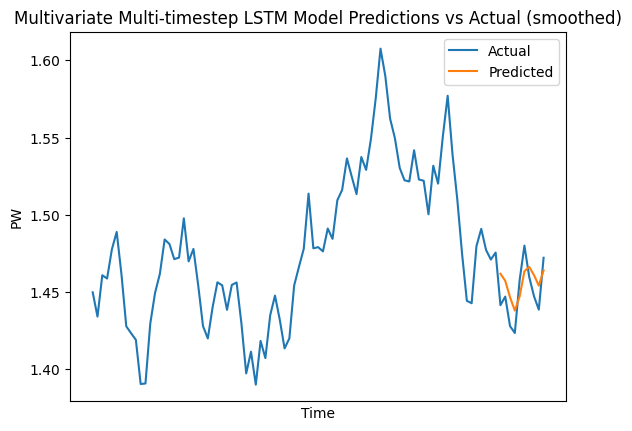

In [ ]:
# Prediction
n_future_pred = 10
forecast_period_dates = df_for_training.index[-(n_future_pred):]
forecast = model.predict(trainX[-n_future_pred:])

forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
print(y_pred_future)

forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i)

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Predicted Target':y_pred_future})

df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

original = df[['exp_smoothing']]
original['Date'] = pd.to_datetime(df.index)
original = original.loc[original['Date'] >= '1970-01-01 00:00:00.000003900']

# Calculate the time interval between timesteps to shift (n_future-1) timesteps to the left (alignment)
time_interval = df_forecast['Date'].diff().mean()
df_forecast['Date'] = df_forecast['Date'] - (n_future-1) * time_interval
original = original[:-(n_future-1)]

# Plot the results
sns.lineplot(data=original, x='Date', y='exp_smoothing', label='Actual')
sns.lineplot(data=df_forecast, x='Date', y='Predicted Target', label='Predicted')
plt.xlabel('Time')
plt.ylabel('PW')
plt.title('Multivariate Multi-timestep LSTM Model Predictions vs Actual (smoothed)')
plt.legend()
plt.show()

In [ ]:
# Exponential Smoothing Unsmoothed Extrapolation
smoothed_predictions = df_forecast['Predicted Target']
smoothed_actual = df[main_column][lookback:lookback + len(smoothed_predictions)]
unsmoothed_actual = df['PW']
unsmoothed_predictions = []

for i in range(len(smoothed_predictions)-1):
  unsmoothed_predictions.append((smoothed_predictions[i+1] - (1 - alpha) * smoothed_predictions[i])/alpha)
  #print(f'{unsmoothed_actual.iloc[i]}, {unsmoothed_predictions[i]}')

forecast_dates_2 = forecast_dates[:-1]
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates_2), 'Predicted Target':unsmoothed_predictions})

df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

print("unsmoothedpredictions")
print(unsmoothed_predictions)
# Center forecast (denormalize)
mean_pred = df_forecast['Predicted Target'].mean()
centered_pred = df_forecast['Predicted Target'] - mean_pred
doubled_pred = centered_pred + mean_pred
df_forecast['Predicted Target'] = doubled_pred

print("predictedtarget")
print(df_forecast['Predicted Target'])

# Prepare Date column
original = df[['PW']]
original['Date'] = pd.to_datetime(df.index)
original = original.loc[original['Date'] >= '1970-01-01 00:00:00.000003900']
print(original)

# Calculate the time interval between timesteps to shift (n_future-1) timesteps to the left (alignment)
time_interval = df_forecast['Date'].diff().mean()
df_forecast['Date'] = df_forecast['Date'] - (n_future-1) * time_interval
original = original[:-(n_future)]

# Plot the results
sns.lineplot(data=original, x='Date', y='PW', label='Actual')
sns.lineplot(data=df_forecast, x='Date', y='Predicted Target', label='Predicted')
plt.xlabel('Time')
plt.ylabel('PW')
plt.title('Multivariate Multi-timestep LSTM Model Predictions vs Actual (unsmoothed)')
plt.legend()
plt.show()

unsmoothedpredictions
[1.3307092189788807, 1.152390718460085, 1.1991825614656724, 1.7000167540141535, 1.9140453508922064, 1.5442244495664335, 1.3124468837465588, 1.2662820305143094, 1.736810684204101]
predictedtarget
0    1.330709
1    1.152391
2    1.199183
3    1.700017
4    1.914045
5    1.544224
6    1.312447
7    1.266282
8    1.736811
Name: Predicted Target, dtype: float64
       PW                          Date
time                                   
3900  1.0 1970-01-01 00:00:00.000003900
3901  2.2 1970-01-01 00:00:00.000003901
3902  1.4 1970-01-01 00:00:00.000003902
3903  2.0 1970-01-01 00:00:00.000003903
3904  1.8 1970-01-01 00:00:00.000003904
...   ...                           ...
3996  1.6 1970-01-01 00:00:00.000003996
3997  0.8 1970-01-01 00:00:00.000003997
3998  1.7 1970-01-01 00:00:00.000003998
3999  1.9 1970-01-01 00:00:00.000003999
4000  2.0 1970-01-01 00:00:00.000004000

[101 rows x 2 columns]


<ipython-input-32-6ebaee427092>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(df.index)


# Exp Smoothing, Double Exp Smoothing and Holts-Winter Model

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
import matplotlib.pyplot as plt

train_time_series = df['PW'][:-15]

# Fit Simple Exponential Smoothing
simple_exp_model = SimpleExpSmoothing(train_time_series).fit()

# Fit Double Exponential Smoothing (Holt's Linear Trend Model)
double_exp_model = Holt(train_time_series).fit()

# Fit Holt-Winters model with multiplicative seasonality
holt_winters_model = ExponentialSmoothing(train_time_series, seasonal='add', seasonal_periods=200).fit()

# Make predictions
forecast_steps = 15  # Number of steps to forecast
simple_exp_forecast = simple_exp_model.forecast(forecast_steps)
double_exp_forecast = double_exp_model.forecast(forecast_steps)
holt_winters_forecast = holt_winters_model.forecast(forecast_steps)

# Plot the results
plt.figure(figsize=(14, 8))

# Original Data
plt.plot(df['PW'][-110:], label='Original Data')

# Forecasts
plt.plot(simple_exp_forecast, label='Simple Exponential Smoothing', linestyle='--')
plt.plot(double_exp_forecast, label='Double Exponential Smoothing', linestyle='--')
plt.plot(holt_winters_forecast, label='Holt-Winters (Additive Seasonality)', linestyle='--')

# Plot Configuration
plt.title('Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('PW')
plt.legend()
plt.show()

# Print forecasted values
print("Simple Exponential Smoothing Forecast:")
print(simple_exp_forecast)
print("\nDouble Exponential Smoothing Forecast:")
print(double_exp_forecast)
print("\nHolt-Winters Forecast (Multiplicative Seasonality):")
print(holt_winters_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Simple Exponential Smoothing Forecast:
3985    1.46364
3986    1.46364
3987    1.46364
3988    1.46364
3989    1.46364
3990    1.46364
3991    1.46364
3992    1.46364
3993    1.46364
3994    1.46364
3995    1.46364
3996    1.46364
3997    1.46364
3998    1.46364
3999    1.46364
dtype: float64

Double Exponential Smoothing Forecast:
3985    1.271610
3986    1.263568
3987    1.255525
3988    1.247483
3989    1.239441
3990    1.231399
3991    1.223357
3992    1.215315
3993    1.207273
3994    1.199231
3995    1.191189
3996    1.183147
3997    1.175105
3998    1.167063
3999    1.159021
dtype: float64

Holt-Winters Forecast (Multiplicative Seasonality):
3985    1.631455
3986    1.399837
3987    1.547193
3988    1.442010
3989    1.373625
3990    1.310503
3991    1.510442
3992    1.705359
3993    1.773751
3994    1.678860
3995    1.520959
3996    1.494705
3997    1.489361
3998    1.620830
3999    1.478904
dtype: float64


# PyPi Package

In [ ]:
features = ['PPB', 'APW', 'SNR']

# Variables needed:
# time_column (in our case 1,...,len(df))
# X: df[features]
# Y: df['PW']
# smoothing: exp_smoothing (default) or moving_average
# param: parameter associated with smoothing, if -1, set automatically
# - exp_smoothing: alpha
# - moving_average: rolling_avg_window_size
# lookback: 10
# n_future
# model: 'LSTM', 'custom'
# custom_model: None (default)
# epochs: number of epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 123ms/step - loss: 0.2093 - val_loss: 0.0629
Epoch 2/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - loss: 0.0658 - val_loss: 0.0636
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step


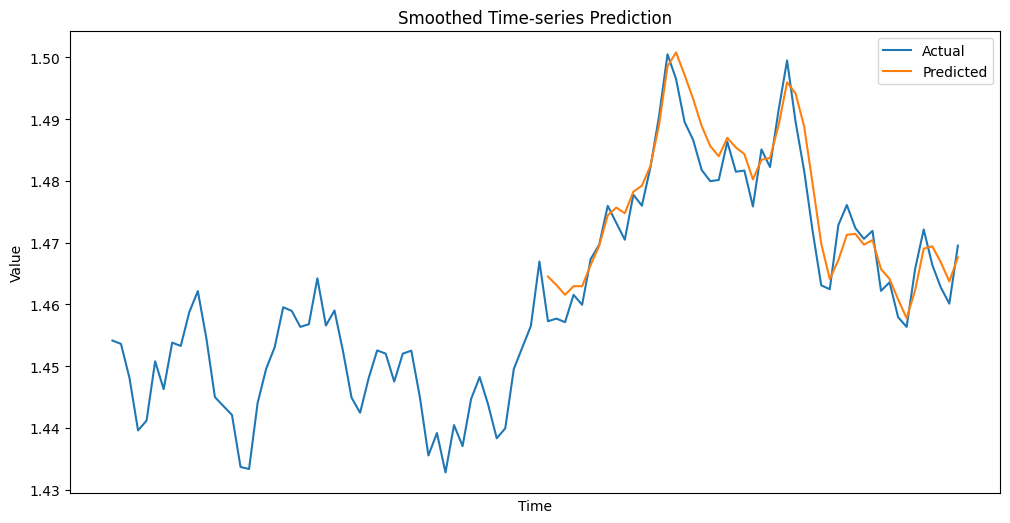

Model saved to desmooth_model.h5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import seaborn as sns
import matplotlib.pyplot as plt

class DesmoothForecasterModel:
    """
    A class to create and train a model that uses smoothed time-series data for forecasting.
    The model supports LSTM or custom neural network architectures and can apply exponential
    smoothing or moving average smoothing to the target variable before training.

    Attributes:
    ----------
    model_type : str
        The type of model to use ('LSTM' or 'custom').
    custom_model : keras.Model, optional
        A custom model to use instead of the default LSTM model.
    smoothing : str
        The smoothing technique to apply ('exp_smoothing' or 'moving_average').
    smoothing_param : float or int
        The parameter for the chosen smoothing method. For exponential smoothing,
        this is the smoothing level (alpha). For moving average, this is the window size.
    scaler : StandardScaler
        A scaler instance used to normalize the data.
    model : keras.Model, optional
        The neural network model to be trained.
    trainX : np.ndarray, optional
        The input training data prepared for the model.
    df_for_training : pd.DataFrame, optional
        The DataFrame containing smoothed and normalized data used for training.
    n_future : int, optional
        The number of future timesteps the model is trained to predict.
    Y : pd.Series, optional
        The original target variable before smoothing.
    lookback : int, optional
        The number of past timesteps used to predict the future.
    """

    def __init__(self, model_type='LSTM', custom_model=None, smoothing="exp_smoothing", smoothing_param=-1):
        """
        Initializes the DesmoothForecasterModel with the specified parameters.

        Parameters:
        ----------
        model_type : str, optional
            The type of model to use ('LSTM' by default, or 'custom').
        custom_model : keras.Model, optional
            A custom model to use instead of the default LSTM model_type (default is None). model_type must be 'custom'.
        smoothing : str, optional
            The smoothing technique to apply ('exp_smoothing' by default, or 'moving_average').
        smoothing_param : float or int, optional
            The parameter for the smoothing method. Default is -1, which auto-sets the value
            based on the smoothing method: 0.01 for exponential smoothing and 10 for moving average.

        Raises:
        ------
        ValueError
            If an invalid smoothing method is provided.
        """
        self.model_type = model_type
        self.custom_model = custom_model
        self.smoothing = smoothing
        self.smoothing_param = smoothing_param
        self.scaler = StandardScaler()
        self.model = None
        self.trainX = None
        self.df_for_training = None
        self.n_future = None
        self.Y = None
        self.lookback = None

        # Adjust smoothing_param if not set
        if self.smoothing_param == -1:
            if self.smoothing == 'exp_smoothing':
                self.smoothing_param = 0.01
            elif self.smoothing == 'moving_average':
                self.smoothing_param = 10

    def smooth_data(self, Y):
        """
        Applies the chosen smoothing technique to the target variable.

        Parameters:
        ----------
        Y : pd.Series
            The target variable to be smoothed.

        Returns:
        -------
        pd.Series
            The smoothed target variable.
        """
        if self.smoothing == 'exp_smoothing':
            exp_smooth_model = SimpleExpSmoothing(Y)
            fit = exp_smooth_model.fit(smoothing_level=self.smoothing_param, optimized=False)
            Y = fit.fittedvalues
        elif self.smoothing == 'moving_average':
            Y = Y.rolling(window=self.smoothing_param).mean()

        return Y

    def prepare_data(self, time_column, X, Y, lookback, n_future) -> pd.DataFrame:
        """
        Prepares the input and output data for training the model by applying smoothing,
        normalizing, and reshaping it into sequences.

        Parameters:
        ----------
        time_column : pd.Series or pd.Index
            The time indices or datetime values for the data.
        X : pd.DataFrame
            The input features (e.g., df[features]).
        Y : pd.Series
            The target variable (e.g., df['PW']).
        lookback : int
            The number of past timesteps used to predict the future (e.g., 10).
        n_future : int
            The number of future timesteps to predict.

        Returns:
        -------
        np.ndarray
            The prepared output data (target variable) for training.

        Raises:
        ------
        ValueError
            If not enough data is available to create training samples.
        """
        # Set data
        self.Y = Y
        # Smooth the data
        Y = self.smooth_data(Y)

        # Create training dataframe
        df_for_training = pd.concat([Y, X], axis=1)
        df_for_training['time_column'] = time_column
        df_for_training = df_for_training.set_index('time_column')
        df_for_training = df_for_training.rename(columns={df_for_training.columns[0]: "smoothed"})

        # Normalize the dataset
        df_for_training_scaled = self.scaler.fit_transform(df_for_training)

        # Create training data
        trainX, trainY = [], []
        for i in range(lookback, len(df_for_training_scaled) - n_future + 1):
            trainX.append(df_for_training_scaled[i - lookback:i, 0:df_for_training.shape[1]])
            trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

        trainX, trainY = np.array(trainX), np.array(trainY)

        # Ensure data consistency
        assert trainX.shape[0] > 0, "Not enough data to create training samples."
        assert trainX.shape[0] == trainY.shape[0], "Mismatch between trainX and trainY in number of samples."

        # Save instance variables
        self.trainX = trainX
        self.df_for_training = df_for_training

        return trainY

    def build_model(self, input_shape) -> Sequential:
        """
        Builds the neural network model based on the specified model type.

        For an LSTM model, it creates a sequential model with two LSTM layers,
        followed by dense layers. If a custom model is specified, it will use that instead.

        Returns:
        -------
        keras.Model
            The compiled neural network model.

        Raises:
        ------
        ValueError
            If neither a default LSTM nor a custom model is provided.
        """
        if self.model_type == "LSTM":
            # Default LSTM Model
            model = Sequential()
            model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
            model.add(Dropout(0.2))
            model.add(LSTM(units=50, return_sequences=False))
            model.add(Dropout(0.2))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mean_squared_error')
            print(model.summary())
            self.model = model
        elif self.model_type == "custom":
            self.model = self.custom_model
        else:
            raise ValueError(f"Invalid model type: {self.model_type}")

        return self.model

    def train_model(self, time_column, X, Y, lookback, n_future, epochs, batch_size=32, validation_split=0.2) -> Sequential:
        """
        Trains the neural network model on the prepared data.

        Parameters:
        ----------
        X : np.ndarray
            The input data for training, prepared by the prepare_data method.
        y : np.ndarray
            The target variable for training.
        model : keras.Model, optional
            A custom model to use instead of the default LSTM model (default is None).
        epochs : int, optional
            The number of epochs to train the model (default is 100).

        Returns:
        -------
        keras.Model
            The trained neural network model.
        """
        trainY = self.prepare_data(time_column, X, Y, lookback, n_future)
        self.build_model((self.trainX.shape[1], self.trainX.shape[2]))
        self.lookback = lookback
        self.n_future = n_future

        # Train model
        history = self.model.fit(self.trainX, trainY, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=1)
        return self.model

    def predict(self, data=None, n_timesteps=10) -> pd.DataFrame:
        """
        Predicts future values based on the trained model and prepared data.

        Parameters:
        ----------
        data: pd.DataFrame
            The data to use for prediction. If not provided, the last n_timesteps of the training data will be used.
        n_timesteps : int
            Number of time steps to show forecast for. So, if n_future is 5 and n_timesteps is 20, you will have 4 series of predictions displayed.

        Returns:
        -------
        pd.DataFrame
            A DataFrame containing the actual and predicted values with the corresponding time indices.
        """
        if data is None:
            data = self.df_for_training

        if self.trainX is None or data is None:
            raise ValueError("Model must be trained before predicting.")

        forecast_period_dates = data.index[-(n_timesteps):]
        forecast = self.model.predict(self.trainX[-n_timesteps:])

        forecast_copies = np.repeat(forecast, data.shape[1], axis=-1)
        y_pred_future = self.scaler.inverse_transform(forecast_copies)[:, 0]

        forecast_dates = [time_i for time_i in forecast_period_dates]
        df_forecast = pd.DataFrame({'Time': np.array(forecast_dates), 'Predicted Target': y_pred_future})
        df_forecast['Time'] = pd.to_datetime(df_forecast['Time'])

        original = data['smoothed'].to_frame()
        original['Time'] = pd.to_datetime(data.index)

        # Calculate the time interval between timesteps to shift (n_future-1) timesteps to the left (alignment)
        time_interval = df_forecast['Time'].diff().mean()
        df_forecast['Time'] = df_forecast['Time'] - (self.n_future - 1) * time_interval
        original = original[:-(self.n_future-1)]

        # Slice the original DataFrame to get the last 2.5% of rows
        last_percent_index = int(len(original) * 0.975)
        last_percent_original = original.iloc[last_percent_index:].copy()

        # Plot the results
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=last_percent_original, x='Time', y='smoothed', label='Actual')
        sns.lineplot(data=df_forecast, x='Time', y='Predicted Target', label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Smoothed Time-series Prediction')
        plt.legend()
        plt.show()

        # Now desmooth the smoothed predictions
        smoothed_predictions = df_forecast['Predicted Target']
        smoothed_actual = self.df_for_training['smoothed'][self.lookback:self.lookback + len(smoothed_predictions)]
        unsmoothed_actual = self.Y.to_frame()
        unsmoothed_predictions = []

        if (self.smoothing == 'exp_smoothing'):
          for i in range(len(smoothed_predictions)-1):
            unsmoothed_predictions.append((smoothed_predictions[i+1] - (1 - self.smoothing_param) * smoothed_predictions[i])/self.smoothing_param)
        elif (self.smoothing == 'moving_average'):
          for i in range(len(smoothed_predictions)-1):
            unsmoothed_predictions.append(smoothed_predictions[i] * self.smoothing_param - sum(unsmoothed_actual[max(0, i-self.smoothing_param+1):i]))

        forecast_dates_2 = forecast_dates[:-1]
        df_forecast = pd.DataFrame({'Time':np.array(forecast_dates_2), 'Predicted Target':unsmoothed_predictions})

        df_forecast['Time'] = pd.to_datetime(df_forecast['Time'])

        # Center forecast (denormalize)
        mean_pred = df_forecast['Predicted Target'].mean()
        centered_pred = df_forecast['Predicted Target'] - mean_pred
        doubled_pred = centered_pred + mean_pred
        df_forecast['Predicted Target'] = doubled_pred

        # Prepare Date column
        original = self.Y.to_frame()
        original['Time'] = pd.to_datetime(self.df_for_training.index)

        # Calculate the time interval between timesteps to shift (n_future-1) timesteps to the left (alignment)
        time_interval = df_forecast['Time'].diff().mean()
        df_forecast['Time'] = df_forecast['Time'] - (self.n_future-1) * time_interval
        original = original[:-(self.n_future)]

        # Slice the original DataFrame to get the last 2.5% of rows
        last_percent_index = int(len(original) * 0.975)
        last_percent_original = original.iloc[last_percent_index:].copy()

        # Plot the results
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=last_percent_original, x='Time', y=last_percent_original.iloc[:, 0], label='Actual')
        sns.lineplot(data=df_forecast, x='Time', y='Predicted Target', label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Unsmoothed Time-series Prediction')
        plt.legend()
        plt.show()

        return df_forecast

    def save_trained_model(self, file_path: str) -> None:
        """
        Saves the trained model to the specified file path.

        Parameters:
        file_path (str): The path where the model will be saved.

        Returns:
        None
        """
        if self.model is not None:
            self.model.save(file_path)
            print(f"Model saved to {file_path}")
        else:
            raise ValueError("No model has been trained yet.")

n_future = 7
desmooth_instance = DesmoothForecasterModel(model_type='LSTM', custom_model=None, smoothing="exp_smoothing", smoothing_param=-1)
model = desmooth_instance.train_model(df.index, df[features], df['PW'], lookback=100, n_future=n_future, epochs=2)
predictions = desmooth_instance.predict(n_timesteps=n_future * 7)
desmooth_instance.save_trained_model('desmooth_model.h5')

In [1]:
# Testing PyPi uploaded package
!pip install DesmoothForecaster==0.4.1

ERROR: Could not find a version that satisfies the requirement DesmoothForecaster==0.4.1 (from versions: 0.1, 0.2, 0.3, 0.4)
ERROR: No matching distribution found for DesmoothForecaster==0.4.1


In [2]:
import gdown

# Read the CSV file into a pandas DataFrame using gdown (csv in google drive)
file_id = '1-3DGmcR8PP9k_HSMmH8B7Lu8XK8vPyKF'
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'file.csv'
gdown.download(download_url, output, quiet=False)

# Read csv
import pandas as pd
df = pd.read_csv(output)
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1-3DGmcR8PP9k_HSMmH8B7Lu8XK8vPyKF
To: /content/file.csv
100%|██████████| 175k/175k [00:00<00:00, 47.3MB/s]


    PW   PPS  PPB           APW     RSCF      RSST  SNR
0  1.1   970   15  1.100000e-06  -143719  0.031467   18
1  2.5   900   25  2.500000e-06 -3403072  0.051412   20
2  0.5  1010   35  5.000000e-07  2614174  0.009697   16
3  1.8  1020   35  1.800000e-06   178590  0.013360   16
4  1.2   910   25  1.200000e-06  2177040  0.046227   10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,251 (122.07 KB)

 Trainable params: 31,251 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 254ms/step - loss: 0.1327 - val_loss: 0.0638
Epoch 2/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - loss: 0.0614 - val_loss: 0.0624
Epoch 3/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - loss: 0.0588 - val_loss: 0.0655
Epoch 4/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - loss: 0.0578 - val_loss: 0.0638
Epoch 5/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 0.0602 - val_loss: 0.0662
Epoch 6/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 0.0569 - val_loss: 0.0656
Epoch 7/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 0.0566 - val_loss: 0.0698
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step


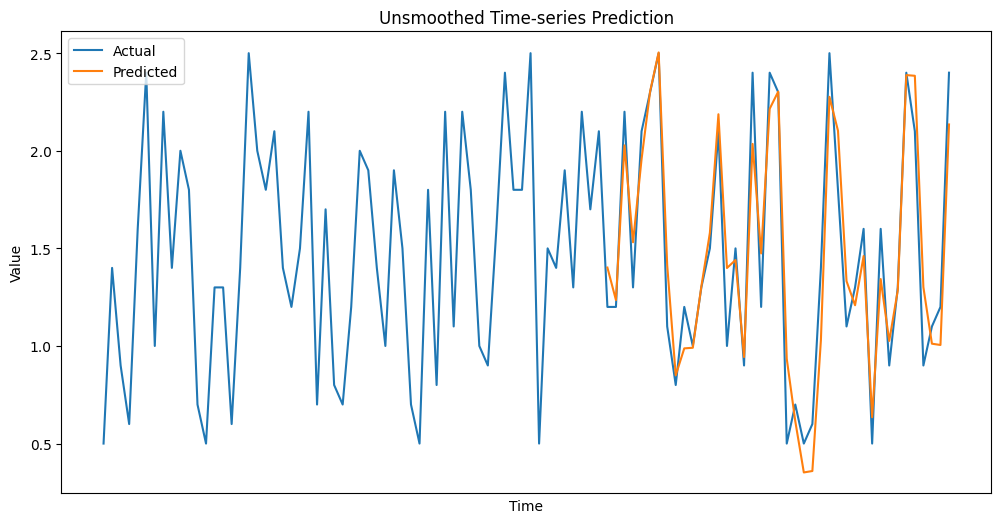

In [3]:
from DesmoothForecaster import DesmoothForecasterModel
features = ['PPB', 'APW', 'SNR']
n_future = 7
desmooth_instance = DesmoothForecasterModel(model_type='LSTM', custom_model=None, smoothing="exp_smoothing", smoothing_param=-1)
model = desmooth_instance.train_model(df.index, df[features], df['PW'], lookback=100, n_future=n_future, epochs=7)
predictions = desmooth_instance.predict(n_timesteps=n_future * 6)